In [1]:
import numpy as np
import pandas as pd
from plotnine import *
from datetime import datetime

In [2]:
spioon_df = pd.read_csv('andmed/spioonid.csv')

spioon_df['kuupäev'] = spioon_df['kuupäev'].apply(lambda x: datetime.fromisoformat(x))
spioon_df['söögigraafik_nädal'] = spioon_df['kuupäev'].apply(lambda x: datetime.isocalendar(x).week % 6)
spioon_df['sekund'] = spioon_df['kuupäev'].apply(lambda x: (x - x.replace(hour=0, minute=0)).total_seconds())

spioon_df.head()

,kuupäev,söögigraafik_nädal,sekund
0,1970-01-01 06:00:00,1,21600.0
1,2023-07-23 14:11:00,5,51060.0
2,2023-07-23 17:30:00,5,63000.0
3,2023-07-23 18:32:00,5,66720.0
4,2023-07-23 21:34:00,5,77640.0


In [3]:
toit_df = pd.read_csv('andmed/söögiajad_õr5.csv', index_col='nädal')

for veerg in toit_df:
    toit_df[veerg] = toit_df[veerg].apply(lambda x: datetime.fromisoformat(x))
    toit_df[veerg] = toit_df[veerg].apply(lambda x: (x - datetime.fromtimestamp(0)).total_seconds())

toit_df

,hommikusöök_algus,hommikusöök_lõpp,hommikusöök_algus_nädalavahetus,hommikusöök_lõpp_nädalavahetus,lõunasöök_algus,lõunasöök_lõpp,õhtusöök_algus,õhtusöök_lõpp,õhtusöök_algus_nädalavahetus,õhtusöök_lõpp_nädalavahetus
nädal,,,,,,,,,,
3,17400.0,18600.0,21000.0,22200.0,36900.0,37920.0,57000.0,58200.0,55800.0,57000.0
2,18000.0,19200.0,21600.0,22800.0,37320.0,38340.0,57480.0,58680.0,56100.0,57300.0
1,18600.0,19800.0,22200.0,23400.0,37740.0,38760.0,57960.0,59160.0,56400.0,57600.0
0,19200.0,20400.0,22800.0,24000.0,38160.0,39180.0,58440.0,59640.0,56700.0,57900.0
5,19800.0,21000.0,23400.0,24600.0,38580.0,39600.0,58920.0,60120.0,57000.0,58200.0
4,20400.0,21600.0,24000.0,25200.0,39420.0,40440.0,59400.0,60600.0,57300.0,58500.0


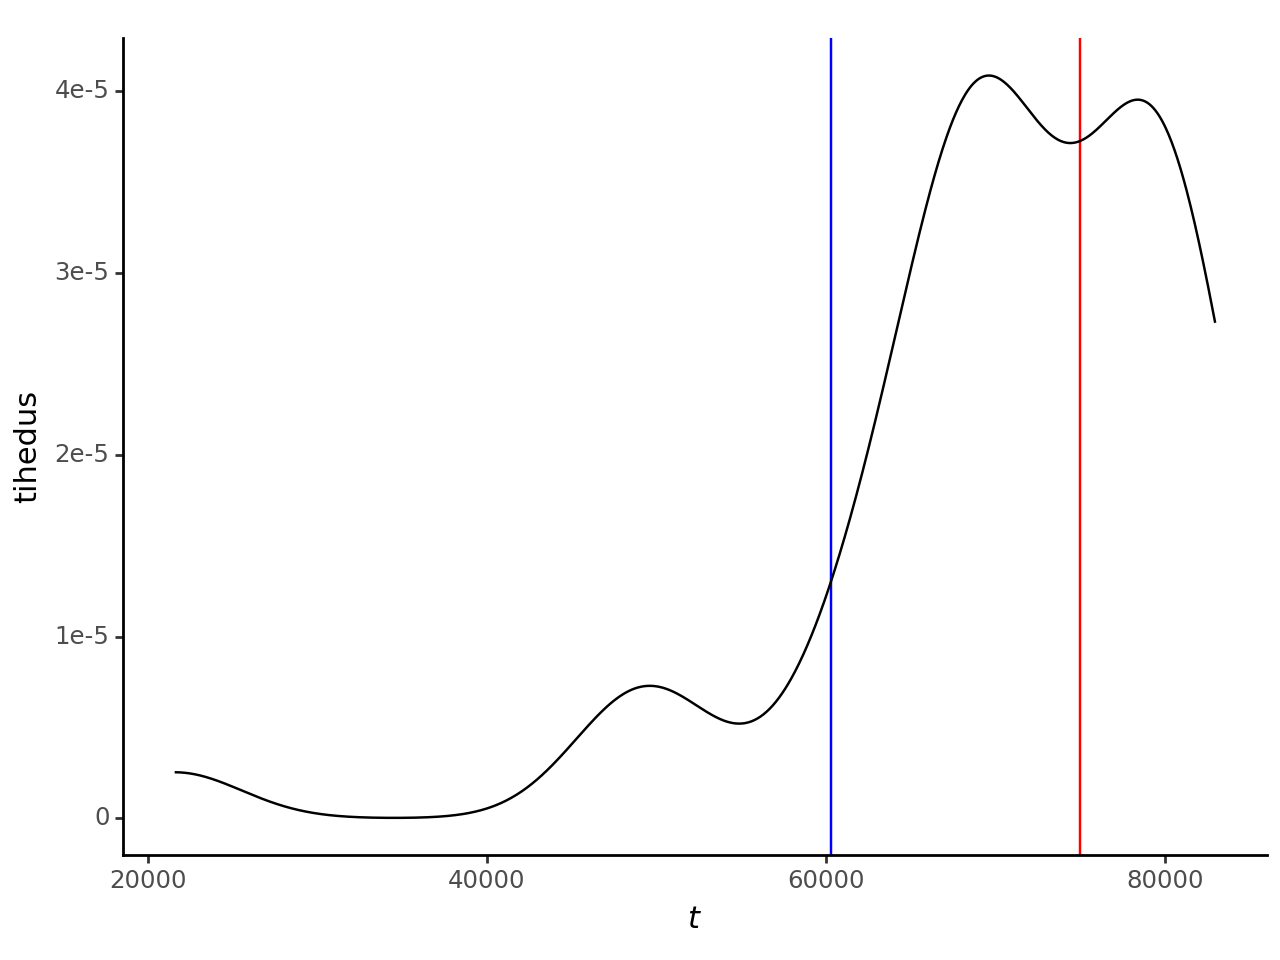

<Figure Size: (640 x 480)>

In [4]:
(
    ggplot(spioon_df) +
    aes('sekund') +
    labs(x='$t$', y='tihedus') +
    theme_classic() +
    geom_vline(xintercept=60300, color='blue') +  # tavaline reservaja al
    geom_vline(xintercept=75000, color='red') +  # õhtuse rivistuse lõpp
    geom_density()
)

C:\Users\martm\anaconda3\lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\martm\anaconda3\lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: paber/spioonide_astmejoonis.png


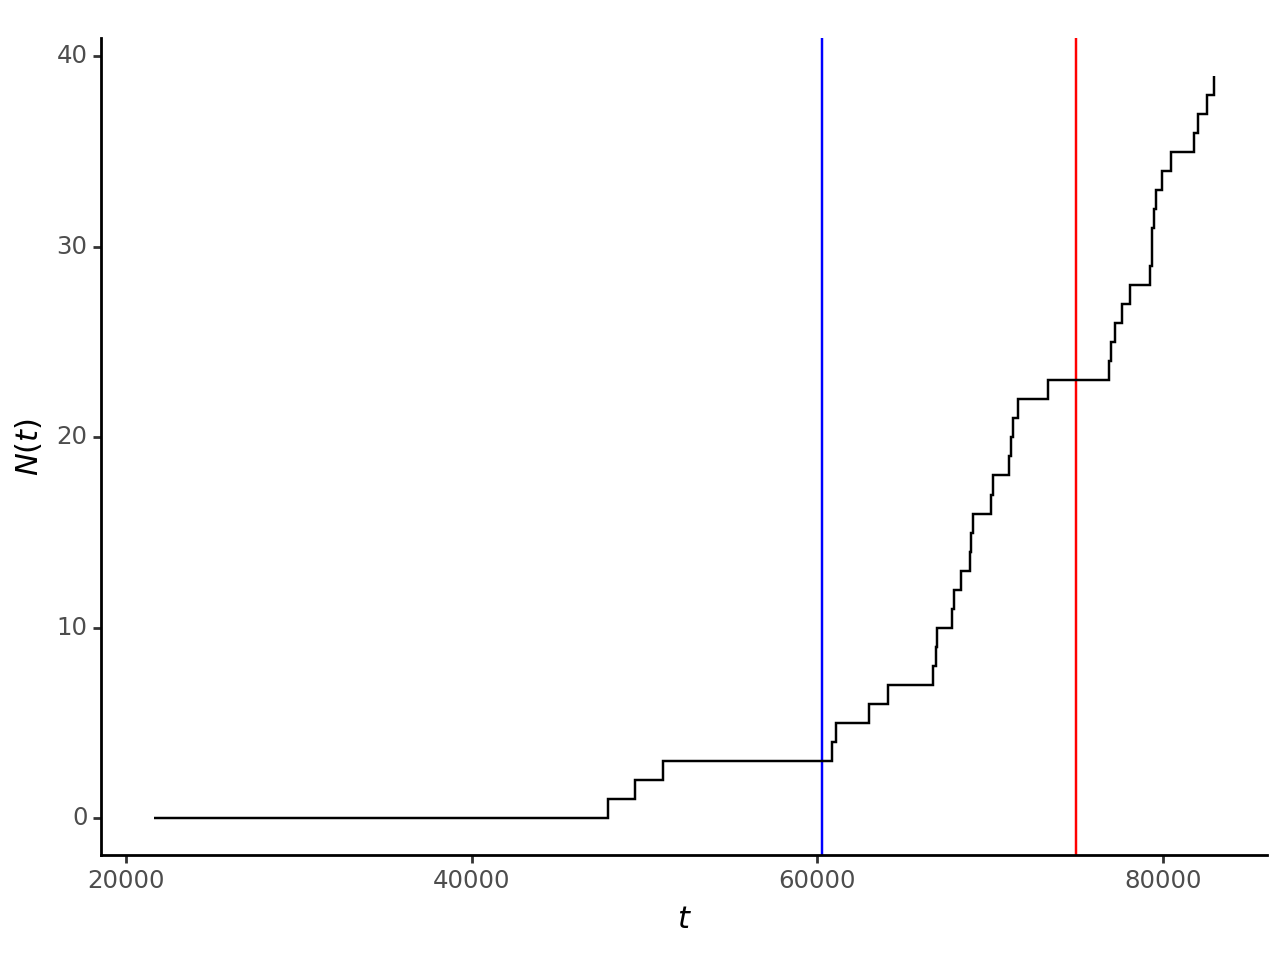

<Figure Size: (640 x 480)>

In [5]:
aste_df = spioon_df.sort_values('sekund')
aste_df['n'] = np.arange(0, aste_df.shape[0])

g = (
    ggplot(aste_df) +
    aes('sekund', 'n') +
    labs(x='$t$', y='$N(t)$') +
    theme_classic() +
    geom_vline(xintercept=60300, color='blue') +  # tavaline reservaja algus
    geom_vline(xintercept=75000, color='red') +  # õhtuse rivistuse lõpp
    geom_step()
)

g.save('paber/spioonide_astmejoonis.png', dpi=100)
g